### Gaussian Mixture Models (GMMs)

Gaussian Mixture Models (GMMs) are probabilistic models that assume data points are composed by a mixture of several
Gaussian distributions with unknown parameters. GMMs allow the decomposition of a complex dataset into a set of
simpler, underlying Gaussian components.

### Creation of a set of synthetic samples with PyCO2stats.GMM

In [1]:
import pyco2stats as PyCO2
import numpy as np

# Case #1: synthetic sample, 2 components, n_samples = 100
my_means_2c = np.array([0.7, 2])
my_stds_2c = np.array([0.6, 0.4])
my_weights_2c = np.array([0.4, 0.6])
my_sample_1 = PyCO2.GMM.sample_from_gmm(n_samples=100, means=my_means_2c, 
                                        stds=my_stds_2c, weights=my_weights_2c, random_state=42)

# Case #2: the same of Case #1, but with n_samples = 1000
my_sample_2 = PyCO2.GMM.sample_from_gmm(n_samples=1000, means=my_means_2c, 
                                        stds=my_stds_2c, weights=my_weights_2c, random_state=42)

# Case #3: synthetic sample 3 components, n_samples = 1000
my_means_3c = np.array([0.7, 2, 2.5])
my_stds_3c = np.array([0.6, 0.4, 0.2])
my_weights_3c_a = np.array([0.2, 0.4, 0.4])
my_sample_3 = PyCO2.GMM.sample_from_gmm(n_samples=1000, means=my_means_3c, 
                                        stds=my_stds_3c, weights=my_weights_3c_a, random_state=42)

# Case #4: the same of Case #3, but with different weigths
my_weights_3c_b = np.array([0.1, 0.7, 0.2])
my_sample_4 = PyCO2.GMM.sample_from_gmm(n_samples=1000, means=my_means_3c, 
                                        stds=my_stds_3c, weights=my_weights_3c_b, random_state=42)


### Plot the resulting GMMs with the matplotlib backend with the **Visualize_Mpl** PyCO2stats module.

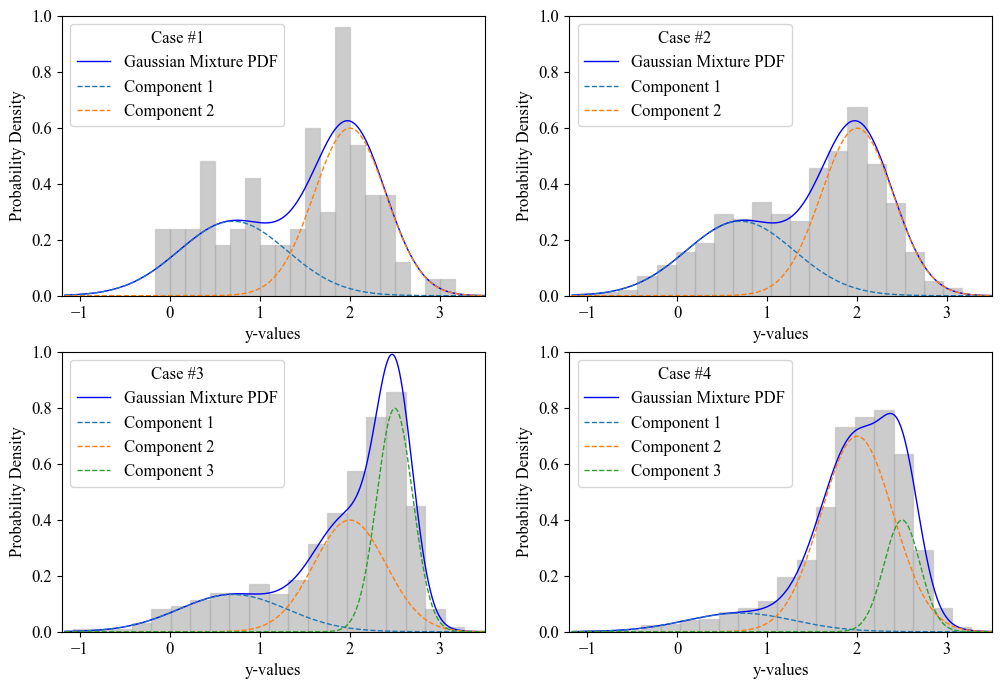

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))  
plt.rcParams['font.family'] = ['Times New Roman'] 
plt.rcParams['font.size'] = 12

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 1}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.4, 'color': 'gray', 'edgecolor': 'darkgrey'}

x_values = np.linspace(min(my_sample_1) - 1, max(my_sample_1) + 1, 1000).reshape(-1, 1)

ax1 = fig.add_subplot(2,2,1)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax1, x_values, my_means_2c, my_stds_2c, my_weights_2c, data=my_sample_1,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax1.legend(title='Case #1')
ax1.set_xlabel('y-values')
ax1.set_ylabel('Probability Density')
ax1.set_ylim(0,1)
ax1.set_xlim(-1.2,3.5)

ax2 = fig.add_subplot(2,2,2)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax2, x_values,my_means_2c, my_stds_2c, my_weights_2c, data=my_sample_2,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax2.legend(title='Case #2')
ax2.set_xlabel('y-values')
ax2.set_ylabel('Probability Density')
ax2.set_ylim(0,1)
ax2.set_xlim(-1.2,3.5)

ax3 = fig.add_subplot(2,2,3)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax3, x_values, my_means_3c, my_stds_3c, my_weights_3c_a, data=my_sample_3,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax3.legend(title='Case #3')
ax3.set_xlabel('y-values')
ax3.set_ylabel('Probability Density')
ax3.set_ylim(0,1)
ax3.set_xlim(-1.2,3.5)

ax4 = fig.add_subplot(2,2,4)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax4, x_values, my_means_3c, my_stds_3c, my_weights_3c_b, data=my_sample_4,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax4.legend(title='Case #4')
ax4.set_xlabel('y-values')
ax4.set_ylabel('Probability Density')
ax4.set_ylim(0,1)
ax4.set_xlim(-1.2,3.5)

plt.savefig("GMM_sampling.png", dpi=300)


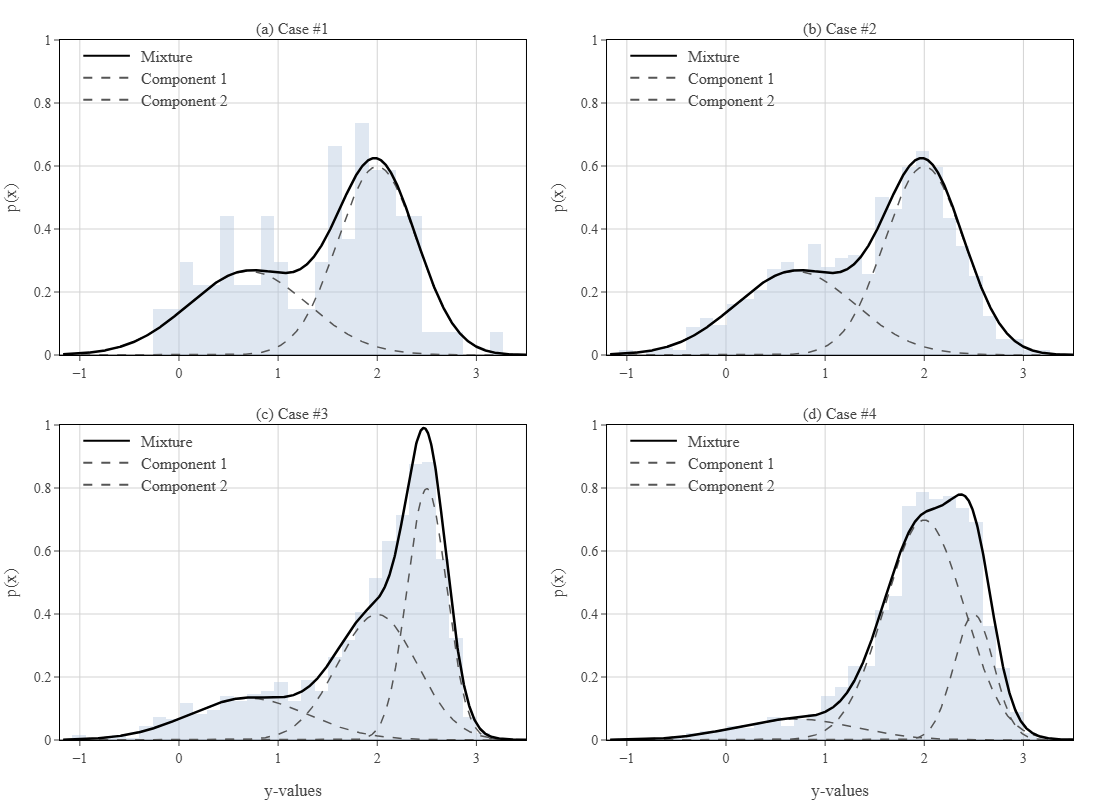

In [3]:
import numpy as np
import pyco2stats as PyCO2
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# ── x-grid & common auto-bins ───────────────────────────────────────
x_values = np.linspace(min(my_sample_1)-1, max(my_sample_1)+1, 1000)
all_data = np.concatenate([my_sample_1, my_sample_2, my_sample_3, my_sample_4])
edges    = np.histogram_bin_edges(all_data, bins='auto')
bin_size = edges[1] - edges[0]

# ── Styles ───────────────────────────────────────────────────────────
mix_kw  = dict(line=dict(color='black', width=2.5))
comp_kw = dict(line=dict(dash='dash', width=1.5, color='#555555'))
hist_base = dict(
    xbins=dict(start=edges[0], end=edges[-1], size=bin_size),
    histnorm='probability density',
    marker=dict(color='lightsteelblue'),
    opacity=0.4,
    showlegend=False
)

# ── Build 2×2 subplots ─────────────────────────────────────────────
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['(a) Case #1','(b) Case #2','(c) Case #3','(d) Case #4'],
    horizontal_spacing=0.08,
    vertical_spacing=0.10
)

# maps (row,col) → axis IDs for ref
axis_map = {
    (1,1): ('x','y'),
    (1,2): ('x2','y2'),
    (2,1): ('x3','y3'),
    (2,2): ('x4','y4')
}

cases = [
    (my_sample_1, my_means_2c,     my_stds_2c,     my_weights_2c,   1, 1),
    (my_sample_2, my_means_2c,     my_stds_2c,     my_weights_2c,   1, 2),
    (my_sample_3, my_means_3c,     my_stds_3c,     my_weights_3c_a, 2, 1),
    (my_sample_4, my_means_3c,     my_stds_3c,     my_weights_3c_b, 2, 2),
]

for sample, meds, stds, wts, r, c in cases:
    hkw = hist_base.copy()
    hist_t, comp_ts, mix_t = PyCO2.Visualize_Plotly.plot_gmm_pdf(
        x_values, meds, stds, wts,
        data=sample,
        pdf_plot_kwargs=mix_kw,
        component_plot_kwargs=comp_kw,
        hist_plot_kwargs=hkw
    )
    fig.add_trace(hist_t, row=r, col=c)
    for tr in comp_ts:
        fig.add_trace(tr, row=r, col=c)
    fig.add_trace(mix_t, row=r, col=c)

    # style axes
    fig.update_xaxes(
        title_text='y-values',
        range=[-1.2, 3.5],
        showline=True, mirror=True, ticks='outside',
        ticklen=5, linecolor='black', gridcolor='lightgray',
        row=r, col=c
    )
    fig.update_yaxes(
        title_text='p(x)',
        range=[0, 1],
        showline=True, mirror=True, ticks='outside',
        ticklen=5, linecolor='black', gridcolor='lightgray',
        row=r, col=c
    )

    # ── Mini-legend in upper‐left corner ────────────────────────────
    xdom, ydom = axis_map[(r,c)]
    legend_items = [
        ("Mixture",      mix_kw ['line']['color'], 'solid'),
        ("Component 1",  comp_kw['line']['color'], 'dash'),
        ("Component 2",  comp_kw['line']['color'], 'dash'),
    ]
    y0 = 0.95
    for text, color, dash in legend_items:
        fig.add_shape(
            type="line",
            x0=0.05, x1=0.15, y0=y0, y1=y0,
            xref=f"{xdom} domain", yref=f"{ydom} domain",
            line=dict(color=color, dash=dash, width=2)
        )
        fig.add_annotation(
            x=0.17, y=y0+0.03,
            xref=f"{xdom} domain", yref=f"{ydom} domain",
            text=text,
            showarrow=False, xanchor="left", font=dict(size=16)
        )
        y0 -= 0.07

# ── Final layout tweaks ─────────────────────────────────────────────
fig.update_layout(
    width=1000, height=800,
    template='none',
    font_family='Times New Roman',
    font_size=14,
    margin=dict(l=60, r=20, t=40, b=60),
    showlegend=False
)

# clear inner titles if you like
fig.layout.xaxis.title.text  = ""
fig.layout.xaxis2.title.text = ""

fig.show()
